In [1]:
# Lab 6th
# Ornstein-Uhlenbeck process
# "my method" - function solution
# final version updated with autocorrelation function

# first we import the functions which will be used for our program.

# we will use the matplotlib, pandas and numpy packages
# we will optionally import statistics package because it might be of need
# same with math package (might be optional)
# there are random numbers here but will be implemented with numpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# optional packages which will be imported as well

import statistics
import math

# we will also import sqrt which stands for square root - it is optional

from numpy import sqrt

In [4]:
# declaring our variables which will be of need
# no function needed
# as meant by using the def term in Python

def OrnsteinUhl(dt = 1, x0 = 0, steps = 1000, alpha = 0.5, mn = 0, sd = 0.5):

# all our variables have been initialized at the beginning of the function
    # (see above)
    
    '''
    meant by:
        dt represents time steps of our function
        x0 represents our starting point
        steps represent the number of steps - initially we will use 1000 steps in our code
        mn represents Gaussian mean (or mean) and will be set to 0 initially
        sd represents Gaussian standard deviation
        alpha represents oscillation parameter
        
    '''
    
    # we will create a result array consisting of zeros
    # using numpy
    
    ns = np.zeros(steps)
    
    # we will initialize all of our array values to zero as their initial position
    # first begin with the start value
    
    ns[0] = x0
    
    for t in range(1, steps):
        ns[t] = alpha * ns[t-1]*dt + sd * np.random.normal(mn,sd)
        
    return ns

OU = OrnsteinUhl()

In [5]:
# before the final plot we will declare the mean, variance and standard deviation values
# new value for mean because the previous one was used to calculate the function
# mn represents Gaussian mean - we will use a new one
# and to calculate them we will use statistics library

# mean value using statistics library

mean = statistics.mean(OU)

print("Mean value is: ", mean)

Mean value is:  0.0006009092128724437


In [6]:
# variance value using statistics library

var = statistics.variance(OU)

print("Variance value is: ", var)

Variance value is:  0.08285705790315645


In [7]:
# standard deviation using statistics library

sdev = statistics.stdev(OU, mean)

print("Standard deviation value is: ", sdev)

Standard deviation value is:  0.2878490192846876


In [8]:
# final charts, plots and figures
# we will display the charts for each process
# first define the figure size

plt.figure(figsize=(20,9))

<Figure size 1440x648 with 0 Axes>

<Figure size 1440x648 with 0 Axes>

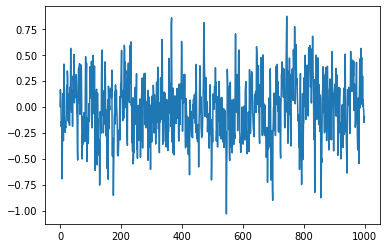

In [9]:
# second define and display the plots for each process
# no starting point (x0) used for the first plot we're trying out

plt.plot(OrnsteinUhl())

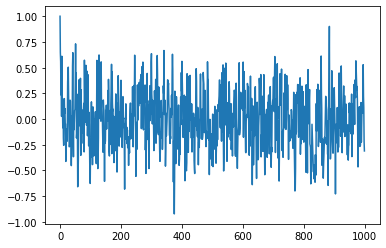

In [10]:
# the upcoming plots are assigned for a starting point of our choice
# we can add whatever value we like

# experiment for x0=1 (our starting point set to 1 for the first try)

plt.plot(OrnsteinUhl(x0=1))

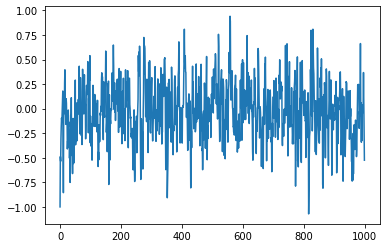

In [11]:
# experiment for x0=-1

plt.plot(OrnsteinUhl(x0=-1))

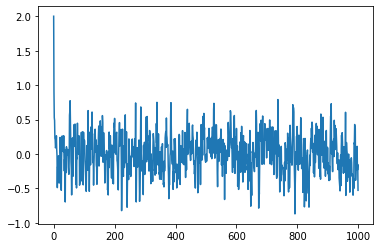

In [12]:
# then add more values we like
# experiment for x0=2

plt.plot(OrnsteinUhl(x0=2))

In [13]:
# and so on
# use it for as many times you want!

final = []

for i in range(10):
    
    y = []
    for j in range(10):
        
        x = OrnsteinUhl()
        y.append(x[-1])
    final.append(np.mean(y))

In [14]:
# covariance using numpy library

cov = np.cov(y)
print("Covariance value is: ", cov)

Covariance value is:  0.0962346531417429


In [15]:
# autocorrelation function

def AutocorrelationFunction(x, lag=20):
    '''
    x: Input Data
    lag: Time lag
    '''
    autocor = np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1] for i in range(1, lag)])
    return autocor

In [16]:
ac = AutocorrelationFunction(x)

print (ac)

[ 1.00000000e+00  5.09856950e-01  2.63047571e-01  1.56134440e-01
  7.78100910e-02  4.39671985e-02  2.66432477e-02  3.20940340e-03
 -9.34581778e-04 -2.37326443e-02 -4.32685284e-02 -3.02440367e-02
 -2.46687771e-02 -1.78781180e-02 -2.90822558e-02 -1.25546618e-02
 -3.05545904e-02 -1.64536450e-02 -4.21421137e-02 -4.01552726e-02]


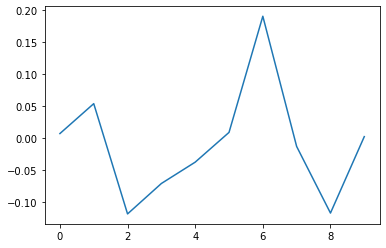

In [17]:
# final plot functions

plt.plot(final)